In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import anndata as ad
import pandas as pd
import numpy as np

import scanpy as sc

from thalamus_merfish_analysis import ccf_plots as cplots
from thalamus_merfish_analysis import abc_load as abc

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

%matplotlib inline

## Load ABC atlas data

In [8]:
version = '20230830'
adata_th_zi = abc.load_adata_thalamus(version=version, 
                             transform='raw', # will manually norm+log2 later
                             subset_to_TH_ZI=True, 
                             with_metadata=True, 
                             flip_y=True,
                             round_z=True,
                             with_colors=False) # need colors to come with

In [28]:
adata_th_zi_neurons = abc.filter_adata_by_class(adata_th_zi, filter_nonneuronal=True,
                                                filter_midbrain=True)

# filter to thalamus boundaries (add a buffer here if wanted)
filter_buffer = 0  # 5
realigned=False
obs_filtered = abc.filter_by_thalamus_coords(adata_th_zi_neurons.obs.copy(), 
                                             realigned=realigned, 
                                             buffer=filter_buffer)
adata_th_zi_neurons = adata_th_zi_neurons[obs_filtered.index].copy() 

In [29]:
gene_list = [gene for gene in adata_th_zi_neurons.var_names if 'Blank' not in gene]
adata_th_zi_neurons = adata_th_zi_neurons[:,gene_list]

In [30]:
adata_th_zi_glut = adata_th_zi_neurons[adata_th_zi_neurons.obs['neurotransmitter']!='GABA'].copy()

In [31]:
adata_glut_log2CPM = adata_th_zi_glut.copy()
adata_glut_log2CPM.X = np.asarray(np.log2(1 + adata_th_zi_glut.X*1e6/np.sum(adata_th_zi_glut.X.toarray(), axis=1, keepdims=True)))

In [36]:
adata_glut_log2CPM

AnnData object with n_obs × n_vars = 62107 × 500
    obs: 'brain_section_label', 'average_correlation_score', 'class', 'cluster', 'cluster_alias', 'left_hemisphere', 'neurotransmitter', 'parcellation_division', 'parcellation_index', 'parcellation_structure', 'parcellation_substructure', 'subclass', 'supertype', 'x_ccf', 'x_reconstructed', 'x_section', 'y_ccf', 'y_reconstructed', 'y_section', 'z_ccf', 'z_reconstructed', 'z_section'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src', 'counts_transform', 'pca', 'subclass_colors'
    obsm: 'X_pca'
    varm: 'PCs'

## Thalamo-seq comparison

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


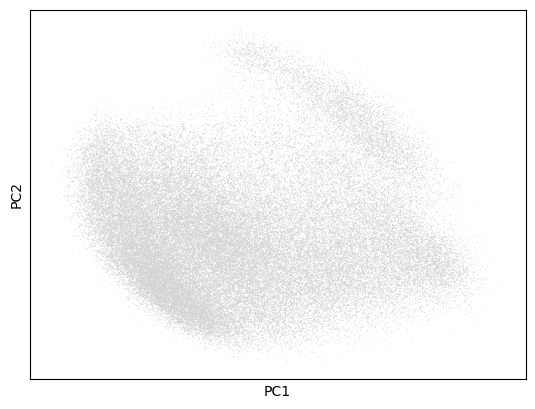

In [32]:
sc.pp.pca(adata_glut_log2CPM)
sc.pl.pca(adata_glut_log2CPM)

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


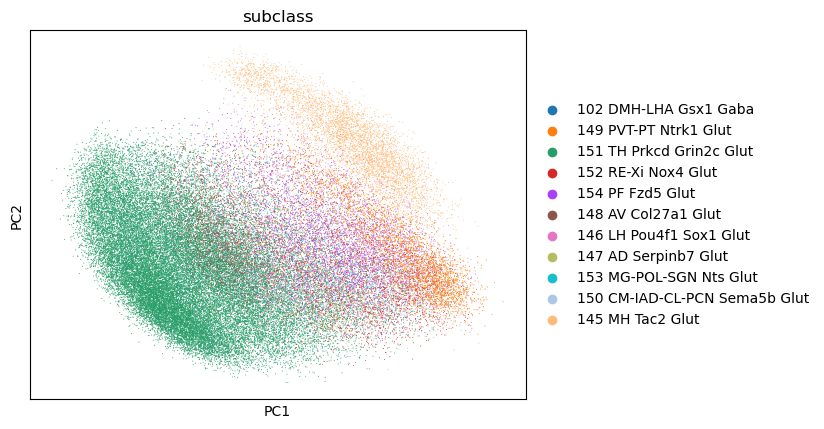

In [33]:
sc.pl.pca(adata_glut_log2CPM, color='subclass')

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


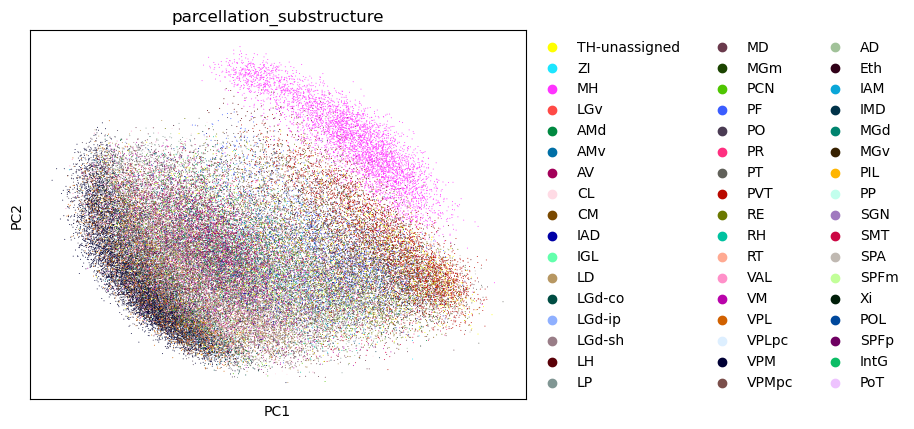

In [37]:
sc.pl.pca(adata_glut_log2CPM, color='parcellation_substructure')

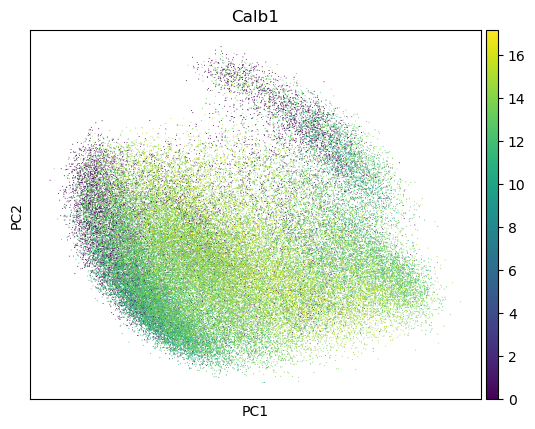

In [34]:
sc.pl.pca(adata_glut_log2CPM, color='Calb1')

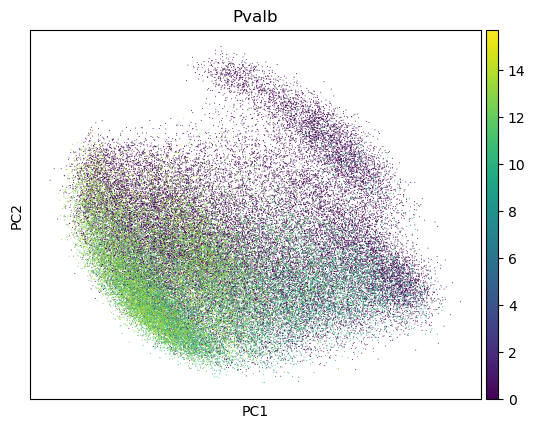

In [35]:
sc.pl.pca(adata_glut_log2CPM, color='Pvalb')

### Genes encoding calcium-binding proteins

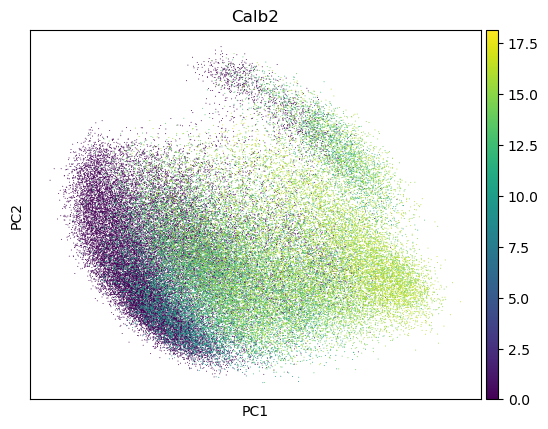

In [38]:
sc.pl.pca(adata_glut_log2CPM, color='Calb2')

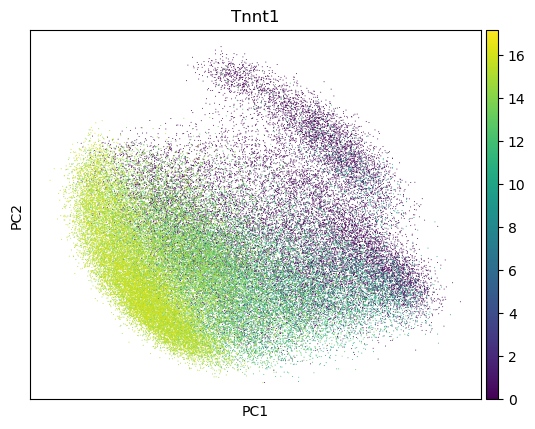

In [39]:
sc.pl.pca(adata_glut_log2CPM, color='Tnnt1')

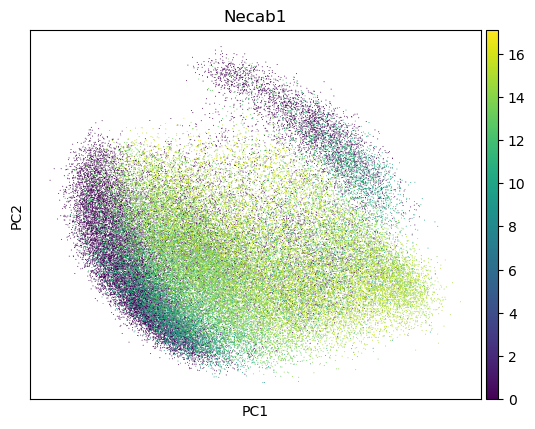

In [40]:
sc.pl.pca(adata_glut_log2CPM, color='Necab1')